In [1]:
import ComputationalHypergraphDiscovery as CHD

In [2]:
import jax.numpy as np
from jax import random
import joblib

In [3]:
def random_noise(noise_scale, noise_subkey, shape):
  return noise_scale * random.normal(noise_subkey, shape)

def uniform_noise(noise_scale, noise_subkey, shape):
  return random.uniform(noise_subkey, shape, minval=-noise_scale, maxval=noise_scale)

def generate_noise(noise_scale, noise_subkey, shape):
  return uniform_noise(noise_scale, noise_subkey, shape)

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [4]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

# How many samples do we generate for training?
n_train = 1000
t_max = 100

# Define a deterministic "time" array from 0 to t_max, inclusive
t = np.linspace(0, t_max, n_train)

# Define four "W" columns with different smooth, bounded functions.
# - Sine wave
W1 = np.sin(0.5 * np.pi * t)

# - Cosine wave of a different frequency
W2 = np.cos(1.3 * t)

# - Tanh, saturates to (-1, +1)
W3 = np.tanh(t - 5.0)

# - Sigmoid, saturates near (0,1)
W4 = 1.0 / (1.0 + np.exp(-(t - 5.0)))

W = np.stack([W1, W2, W3, W4], axis=1)

# Generate some small noise
noise_scale = 0.05
key, noise_subkey = random.split(key)

X=np.concatenate([W[:,:2] + generate_noise(noise_scale, noise_subkey, (n_train, 2)),W],axis=1)
node_names1=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    
kernels=[CHD.Modes.LinearMode(), CHD.Modes.QuadraticMode(), CHD.Modes.GaussianMode(l=0.5)]


In [5]:
graph_discovery1=CHD.GraphDiscovery(X,node_names1,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.077031974268511, Z=(1.00, 1.00), gamma=7.97e+01
Kernel [quadratic] has n/(n+s)=0.07877692890024544, Z=(1.00, 1.00), gamma=7.80e+01
Kernel [gaussian] has n/(n+s)=0.10649288704273394, Z=(0.98, 0.99), gamma=1.51e+02
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.08 after pruning)


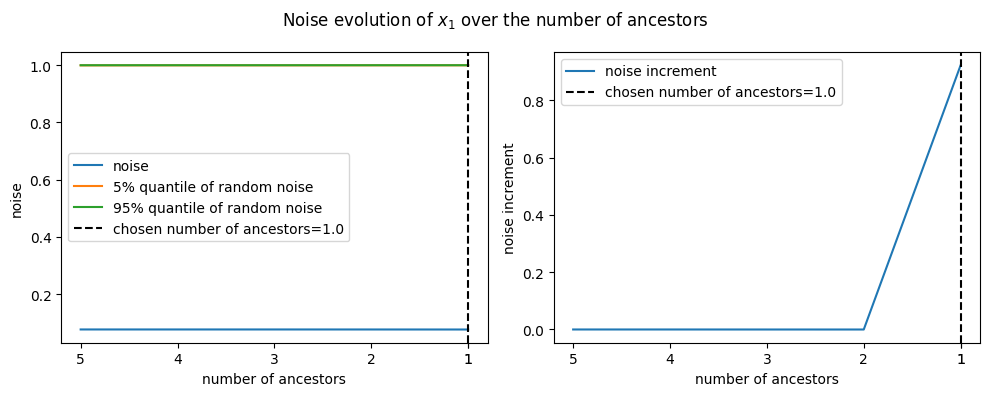

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.07862135353022832, Z=(1.00, 1.00), gamma=8.15e+01
Kernel [quadratic] has n/(n+s)=0.08019304764369503, Z=(1.00, 1.00), gamma=7.99e+01
Kernel [gaussian] has n/(n+s)=0.10420270831220449, Z=(0.98, 0.99), gamma=1.56e+02
$x_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.08 after pruning)


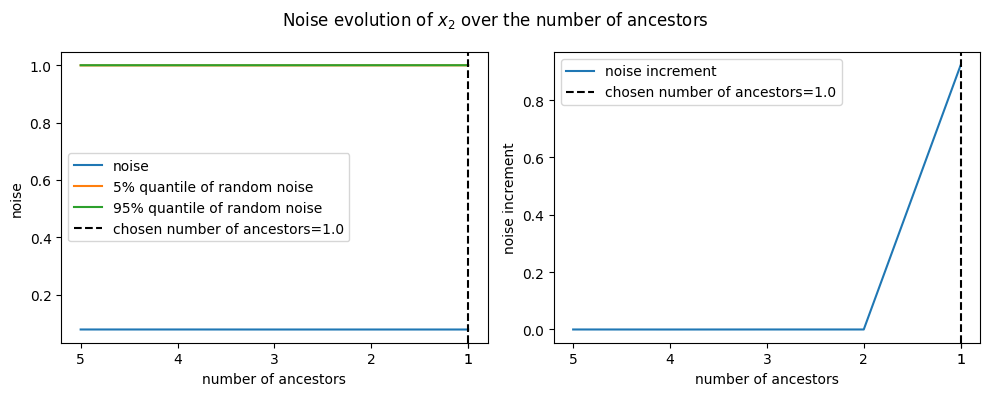

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.07702779481690343, Z=(1.00, 1.00), gamma=7.97e+01
Kernel [quadratic] has n/(n+s)=0.07846499886845977, Z=(1.00, 1.00), gamma=7.80e+01
Kernel [gaussian] has n/(n+s)=0.09655945217011516, Z=(0.98, 0.99), gamma=1.39e+02
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.08 after pruning)


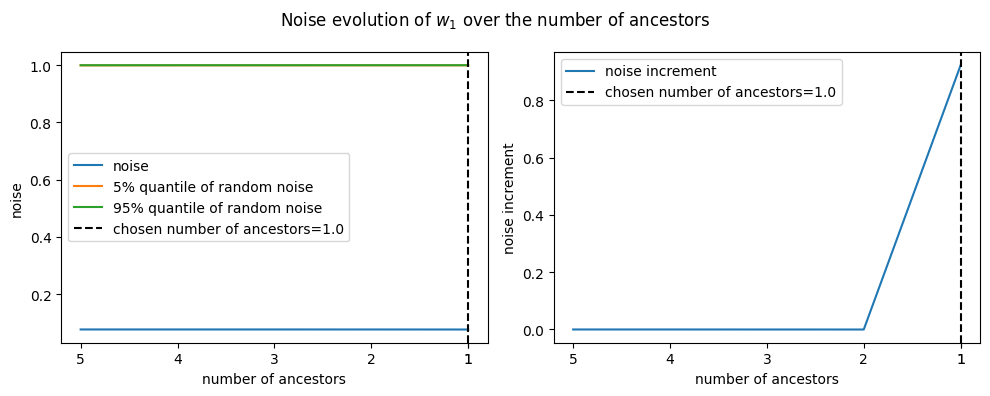

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.0786290109633442, Z=(1.00, 1.00), gamma=8.15e+01
Kernel [quadratic] has n/(n+s)=0.07978122165297873, Z=(1.00, 1.00), gamma=7.99e+01
Kernel [gaussian] has n/(n+s)=0.09946993436068481, Z=(0.98, 0.99), gamma=1.46e+02
$w_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.08 after pruning)


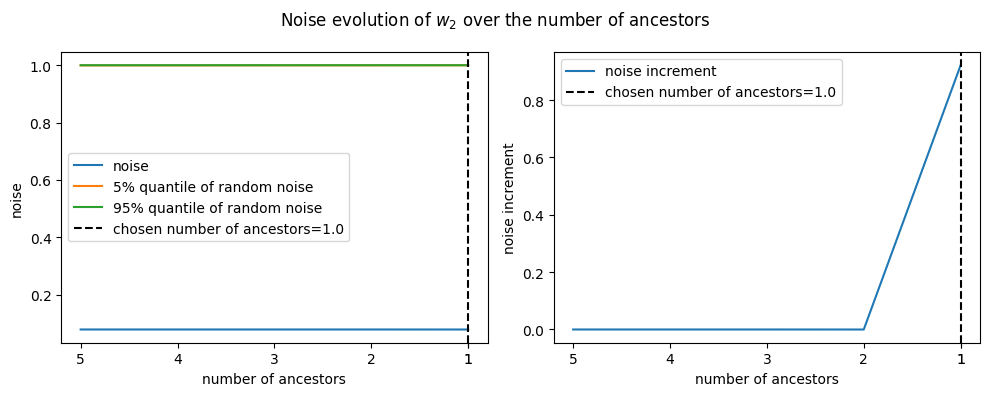

Ancestors of $w_2$: ['$x_2$']


Results for $w_4$
Kernel [linear] has n/(n+s)=0.21037262713137092, Z=(1.00, 1.00), gamma=2.35e+02
Kernel [quadratic] has n/(n+s)=0.33867994992044226, Z=(1.00, 1.00), gamma=3.38e+03
Kernel [gaussian] has n/(n+s)=0.41386904488711257, Z=(0.86, 0.89), gamma=5.63e-04
$w_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.21 after pruning)


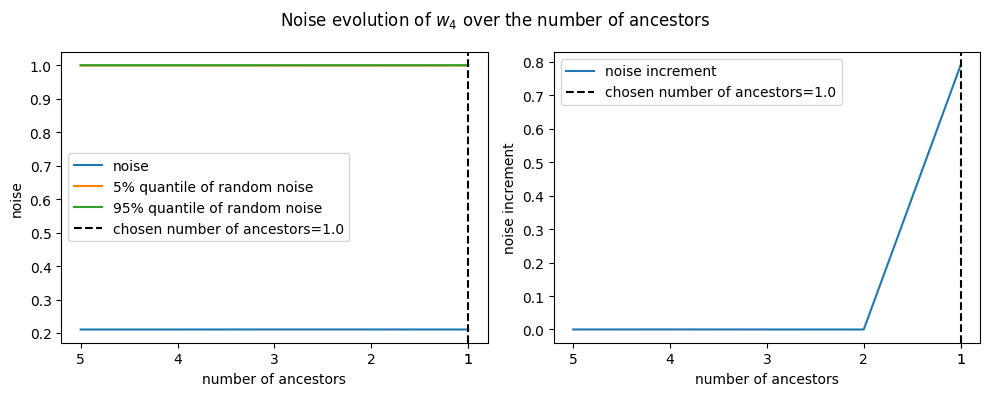

Ancestors of $w_4$: ['$w_3$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]



Results for $w_3$
Kernel [linear] has n/(n+s)=0.21038877577251447, Z=(1.00, 1.00), gamma=2.35e+02
Kernel [quadratic] has n/(n+s)=0.3343966015936438, Z=(1.00, 1.00), gamma=3.02e+03
Kernel [gaussian] has n/(n+s)=0.0010809402723372242, Z=(0.86, 0.89), gamma=8.26e-04
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


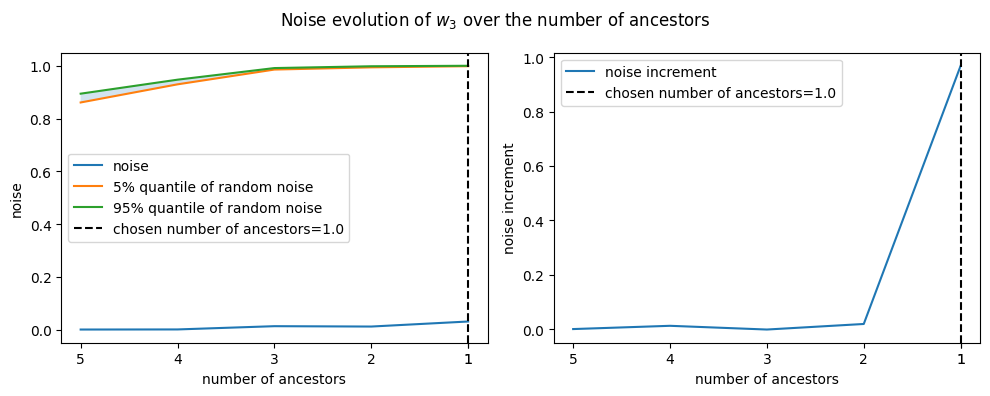

Ancestors of $w_3$: ['$w_4$']



In [6]:
graph_discovery1.fit()

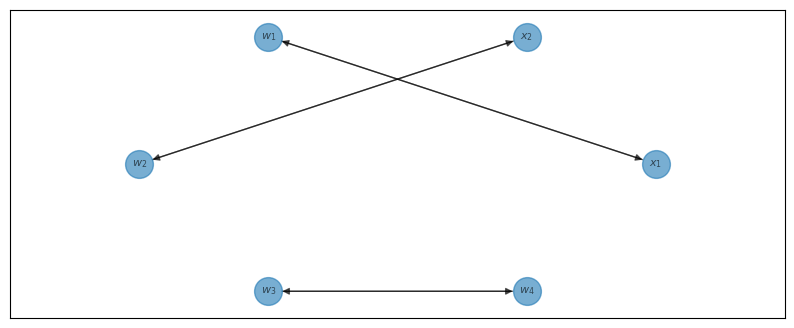

In [7]:
graph_discovery1.plot_graph(type_label=False)

In [8]:
graph_discovery1.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=linear, gamma=79.9, noise=0.0769}
x_2
 = 1.0 * w_2 {kernel=linear, gamma=81.7, noise=0.0785}
w_1
 = 1.0 * x_1 {kernel=linear, gamma=79.9, noise=0.0769}
w_2
 = 1.0 * x_2 {kernel=linear, gamma=81.7, noise=0.0785}
w_3
 = 1.0 * w_4 {kernel=gaussian, gamma=0.0274, noise=0.0315}
w_4
 = 1.0 * w_3 {kernel=linear, gamma=235, noise=0.21}


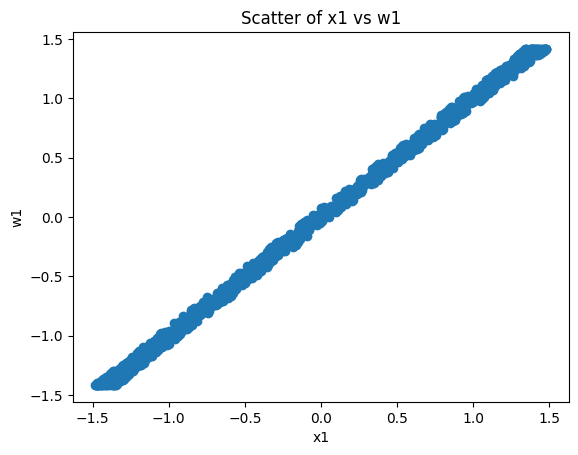

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(graph_discovery1.X[:,graph_discovery1.name_to_index['$x_1$']], graph_discovery1.X[:,graph_discovery1.name_to_index['$w_1$']])
plt.xlabel(f"x1")
plt.ylabel(f"w1")
plt.title(f"Scatter of x1 vs w1")
plt.show()

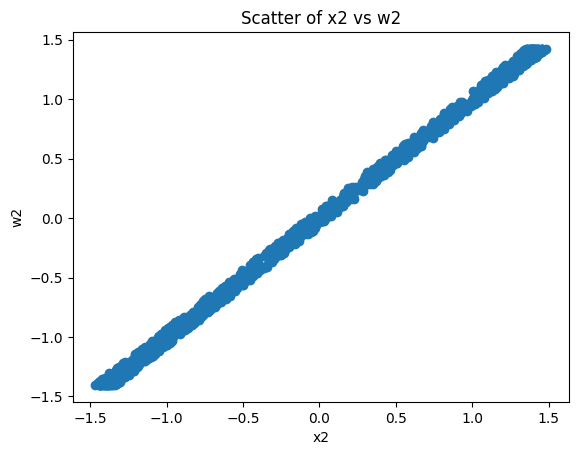

In [10]:
plt.figure()
plt.scatter(graph_discovery1.X[:,graph_discovery1.name_to_index['$x_2$']], graph_discovery1.X[:,graph_discovery1.name_to_index['$w_2$']])
plt.xlabel(f"x2")
plt.ylabel(f"w2")
plt.title(f"Scatter of x2 vs w2")
plt.show()

In [11]:
joblib.dump(graph_discovery1, "example1.pkl")

['example1.pkl']

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [12]:

key, subkey = random.split(key)

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)

X1=W1 + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
X2=X1**2+1+0.1*(W2 + generate_noise(noise_scale, noise_subkey, (n_train,)))

key, noise_subkey = random.split(key)
X3=W3 + generate_noise(noise_scale, noise_subkey, (n_train,))

X=np.concatenate([np.stack([X1, X2, X3], axis=1), W], axis=1)
node_names2=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']

In [13]:
graph_discovery2=CHD.GraphDiscovery(X,node_names2,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.016527455567212537, Z=(1.00, 1.00), gamma=1.66e+01
Kernel [quadratic] has n/(n+s)=0.02377789538837049, Z=(1.00, 1.00), gamma=1.15e+01
Kernel [gaussian] has n/(n+s)=0.0225061712317222, Z=(0.97, 0.98), gamma=1.94e+01
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.02 after pruning)


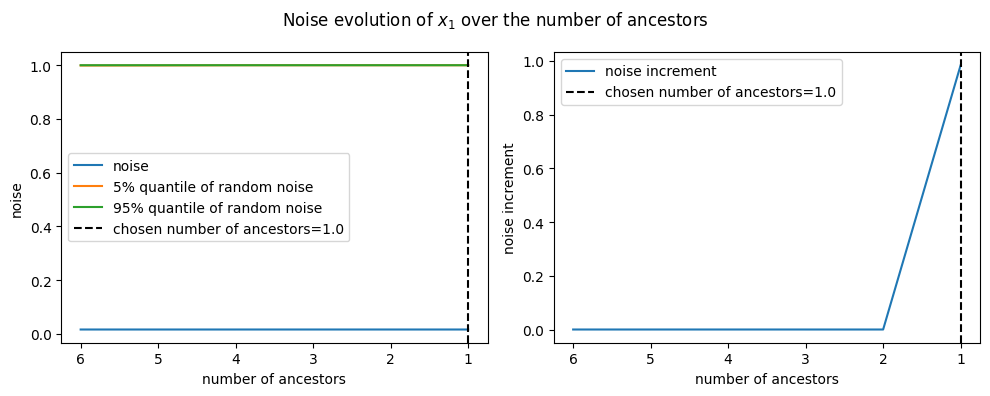

Ancestors of $x_1$: ['$w_1$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.10778403778138171, Z=(1.00, 1.00), gamma=2.10e+02
Kernel [quadratic] has n/(n+s)=0.26123216217602985, Z=(1.00, 1.00), gamma=1.62e+01
Kernel [gaussian] has n/(n+s)=0.13808617763679093, Z=(0.97, 0.98), gamma=3.66e+01
$x_3$ has ancestors with the kernel [linear] | (n/(s+n)=0.03 after pruning)


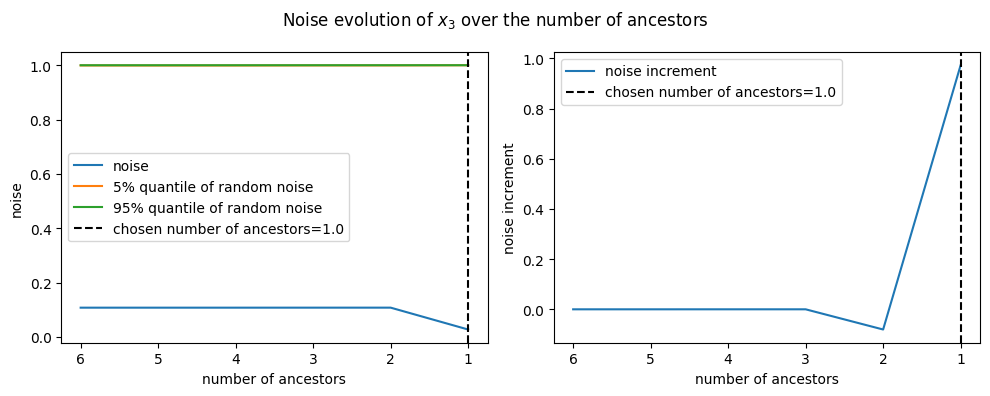

Ancestors of $x_3$: ['$w_3$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.016521862327978587, Z=(1.00, 1.00), gamma=1.66e+01
Kernel [quadratic] has n/(n+s)=0.02366453167593468, Z=(1.00, 1.00), gamma=1.15e+01
Kernel [gaussian] has n/(n+s)=0.030790886566703632, Z=(0.97, 0.98), gamma=3.46e+01
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.02 after pruning)


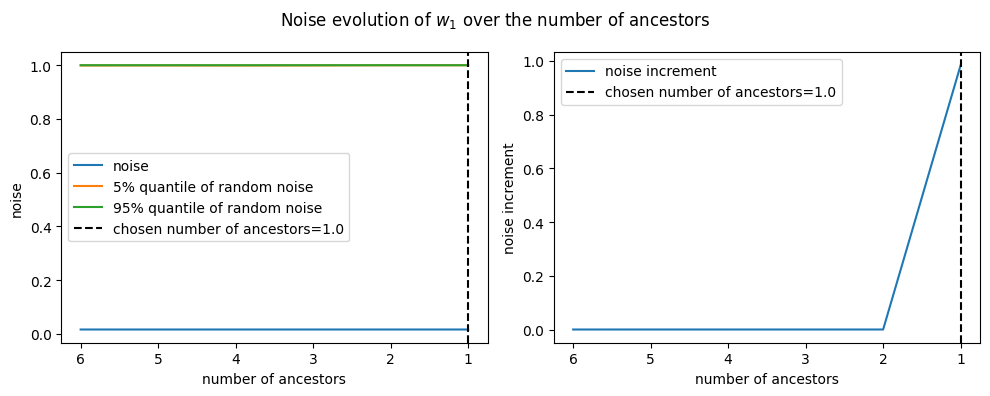

Ancestors of $w_1$: ['$x_1$']


Results for $w_4$
Kernel [linear] has n/(n+s)=0.21074562354958484, Z=(1.00, 1.00), gamma=4.70e+02
Kernel [quadratic] has n/(n+s)=0.3933649846245371, Z=(1.00, 1.00), gamma=1.27e+04
Kernel [gaussian] has n/(n+s)=0.3830452931634311, Z=(0.87, 0.90), gamma=1.00e-03
$w_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.21 after pruning)


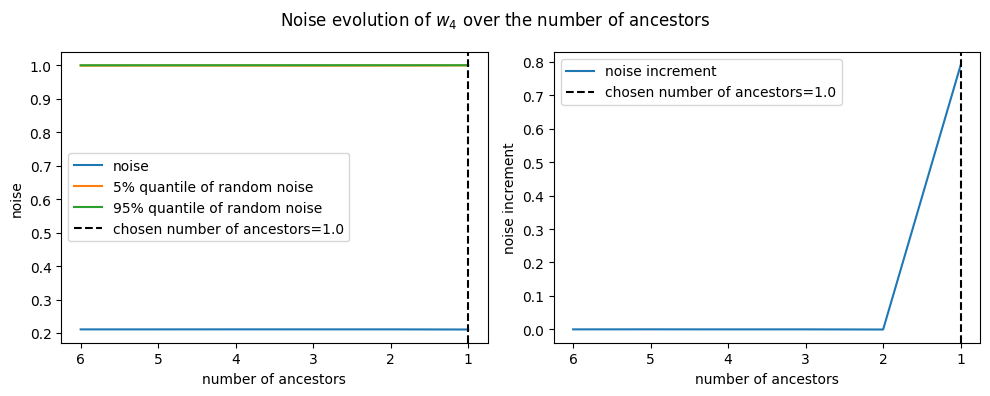

Ancestors of $w_4$: ['$w_3$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]



Results for $x_2$
Kernel [linear] has n/(n+s)=0.9905790558220551, Z=(1.00, 1.00), gamma=1.97e+03
Kernel [quadratic] has n/(n+s)=0.03941761178999237, Z=(1.00, 1.00), gamma=2.53e+00
Kernel [gaussian] has n/(n+s)=0.07124298890029088, Z=(0.98, 0.99), gamma=1.96e+01
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.34 after pruning)


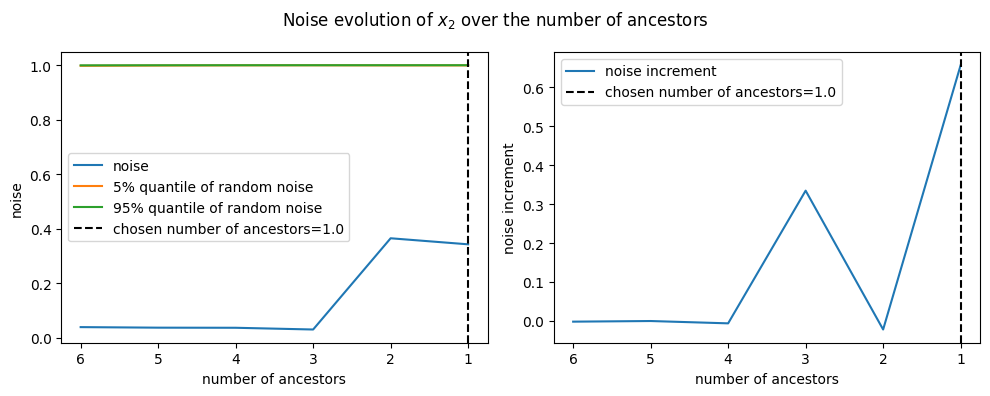

Ancestors of $x_2$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9899037822211636, Z=(1.00, 1.00), gamma=2.06e+03
Kernel [quadratic] has n/(n+s)=0.06191644800595181, Z=(1.00, 1.00), gamma=2.29e-02
Kernel [gaussian] has n/(n+s)=0.11102755766787231, Z=(0.97, 0.98), gamma=1.34e-01
$w_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.02 after pruning)


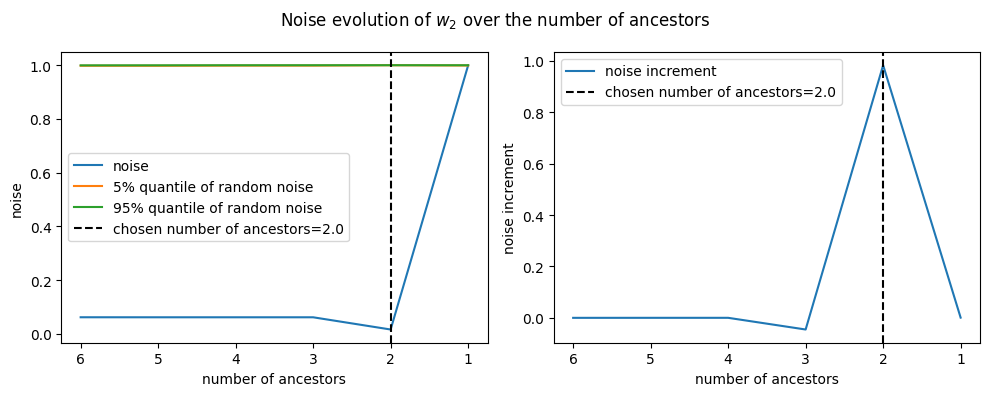

Ancestors of $w_2$: ['$x_1$', '$x_2$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]



Results for $w_3$
Kernel [linear] has n/(n+s)=0.10530566474968651, Z=(1.00, 1.00), gamma=2.05e+02
Kernel [quadratic] has n/(n+s)=0.24106349434747978, Z=(1.00, 1.00), gamma=1.38e+01
Kernel [gaussian] has n/(n+s)=0.007962531696403053, Z=(0.87, 0.90), gamma=1.56e-03
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


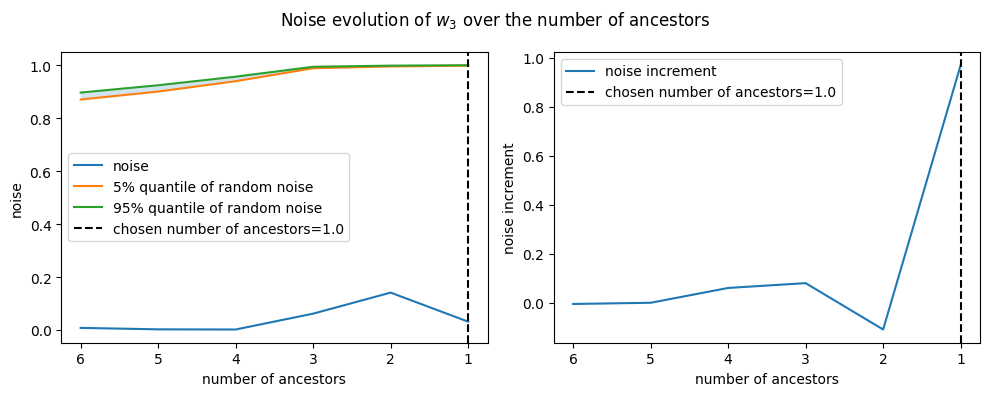

Ancestors of $w_3$: ['$w_4$']



In [14]:
graph_discovery2.fit()

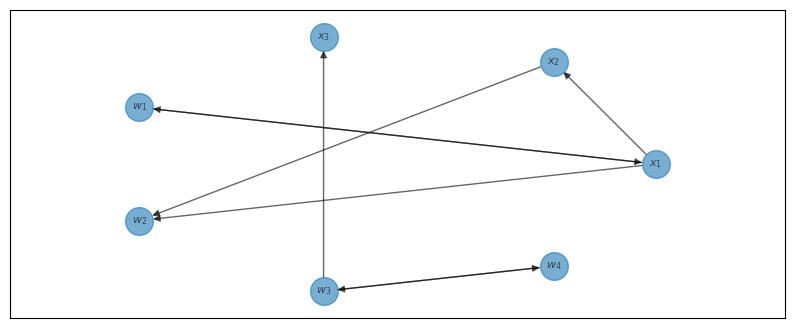

In [15]:
graph_discovery2.plot_graph(type_label=False)

In [16]:
graph_discovery2.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=linear, gamma=16.6, noise=0.0165}
x_2
 = 1.0 * x_1 {kernel=quadratic, gamma=46.5, noise=0.343}
x_3
 = 1.0 * w_3 {kernel=linear, gamma=27.8, noise=0.0274}
w_1
 = 1.0 * x_1 {kernel=linear, gamma=16.6, noise=0.0165}
w_2
 = 1.0 * x_1 {kernel=quadratic, gamma=0.0701, noise=0.0163}
 + 1.0 * x_2 {kernel=quadratic, gamma=0.0701, noise=0.0163}
w_3
 = 1.0 * w_4 {kernel=gaussian, gamma=0.0274, noise=0.0315}
w_4
 = 1.0 * w_3 {kernel=linear, gamma=235, noise=0.21}


In [17]:
joblib.dump(graph_discovery2, "example2.pkl")

['example2.pkl']

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [18]:
key, subkey = random.split(key)

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)
W1n=W1 + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
W2n=W2 + generate_noise(noise_scale, noise_subkey, (n_train,))

X1=W1n*W2n

key, noise_subkey = random.split(key)
X2=W2*np.sin(W4 + generate_noise(noise_scale, noise_subkey, (n_train,)))

X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names3=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [19]:
graph_discovery3=CHD.GraphDiscovery(X,node_names3,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]



Results for $w_4$
Kernel [linear] has n/(n+s)=0.21065840427217797, Z=(1.00, 1.00), gamma=2.32e+02
Kernel [quadratic] has n/(n+s)=0.30554530193020746, Z=(1.00, 1.00), gamma=7.10e-01
Kernel [gaussian] has n/(n+s)=0.28215749936004436, Z=(0.99, 1.00), gamma=2.76e+03
$w_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.21 after pruning)


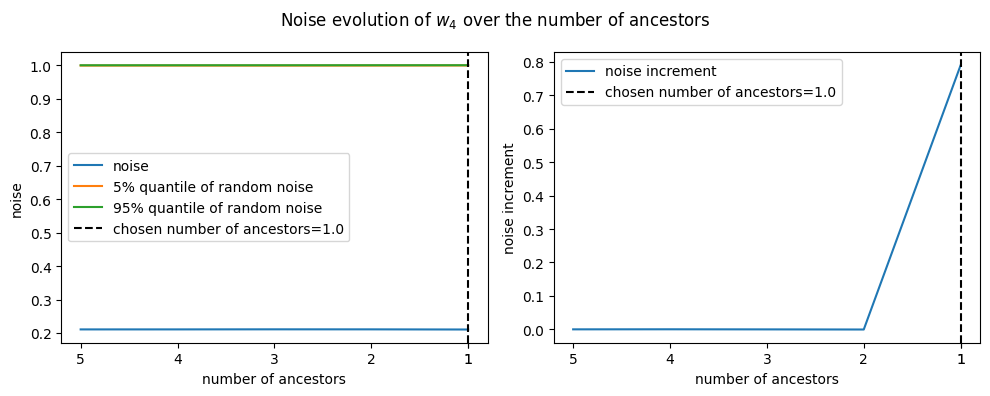

Ancestors of $w_4$: ['$w_3$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]



Results for $x_2$
Kernel [linear] has n/(n+s)=0.3240907398682198, Z=(1.00, 1.00), gamma=3.85e+02
Kernel [quadratic] has n/(n+s)=0.016501908049831506, Z=(1.00, 1.00), gamma=5.14e+00
Kernel [gaussian] has n/(n+s)=0.04179074160810586, Z=(0.98, 0.98), gamma=8.67e+00
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.33 after pruning)


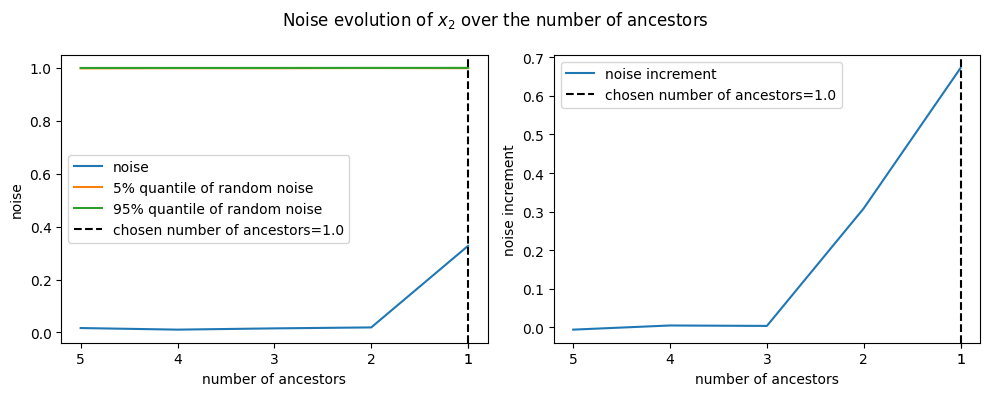

Ancestors of $x_2$: ['$w_2$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:05<00:00,  1.50s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.994106419719539, Z=(1.00, 1.00), gamma=3.82e+03
Kernel [quadratic] has n/(n+s)=0.10892150959781216, Z=(1.00, 1.00), gamma=1.94e+02
Kernel [gaussian] has n/(n+s)=0.06882627504290231, Z=(0.98, 0.99), gamma=2.32e+01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


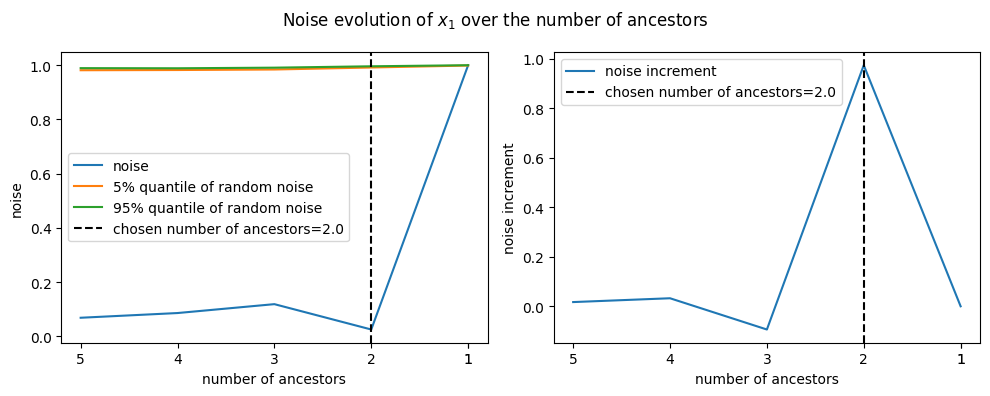

Ancestors of $x_1$: ['$w_1$', '$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.9938013133635366, Z=(1.00, 1.00), gamma=3.88e+01
Kernel [quadratic] has n/(n+s)=0.7292437171397824, Z=(1.00, 1.00), gamma=3.44e+03
Kernel [gaussian] has n/(n+s)=0.6455309680244249, Z=(0.99, 0.99), gamma=2.63e+02
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.72 after pruning)


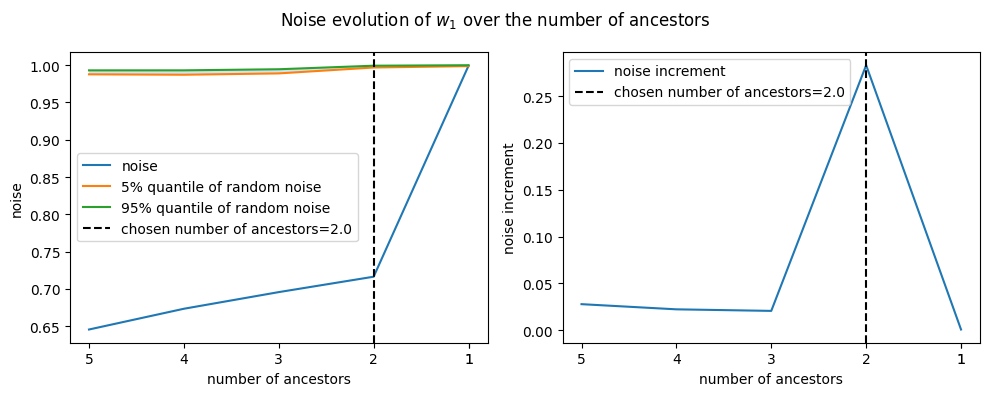

Ancestors of $w_1$: ['$x_1$', '$w_2$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.32368828485146733, Z=(1.00, 1.00), gamma=3.86e+02
Kernel [quadratic] has n/(n+s)=0.37372850745908076, Z=(1.00, 1.00), gamma=2.80e+02
Kernel [gaussian] has n/(n+s)=0.09803583074434954, Z=(0.96, 0.97), gamma=1.67e-01
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.33 after pruning)


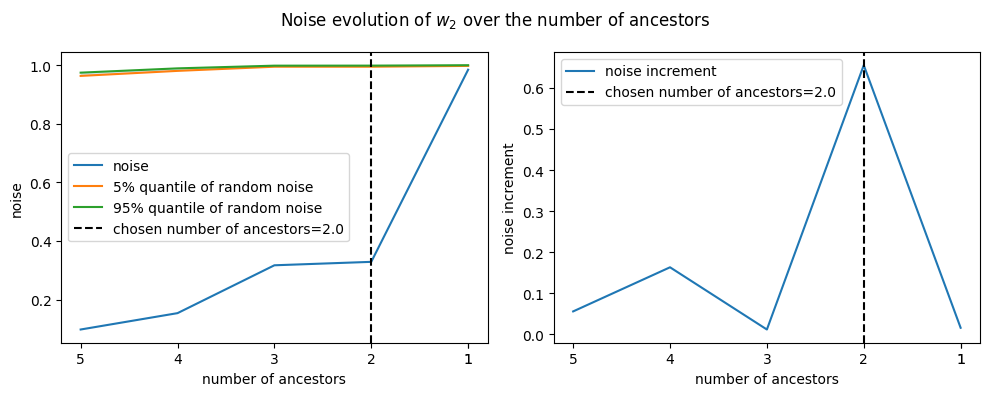

Ancestors of $w_2$: ['$x_2$', '$w_4$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.21107614054738527, Z=(1.00, 1.00), gamma=2.30e+02
Kernel [quadratic] has n/(n+s)=0.32540996113159665, Z=(1.00, 1.00), gamma=3.02e+03
Kernel [gaussian] has n/(n+s)=0.0020242953058471264, Z=(0.89, 0.92), gamma=8.98e-05
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


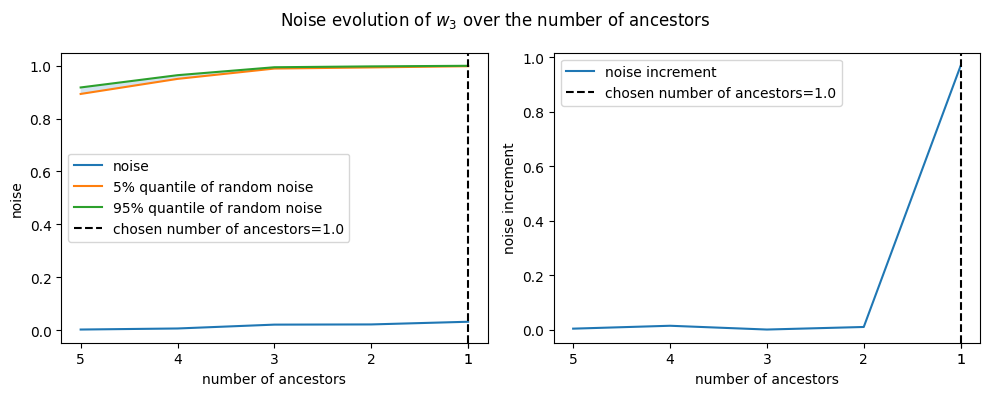

Ancestors of $w_3$: ['$w_4$']



In [20]:
graph_discovery3.fit()

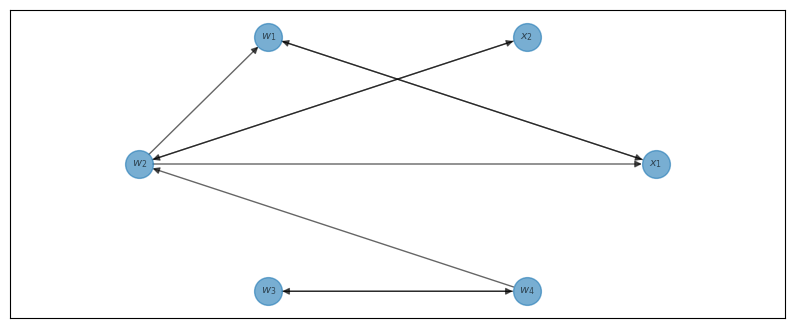

In [21]:
graph_discovery3.plot_graph(type_label=False)

In [22]:
graph_discovery3.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=24.7, noise=0.0255}
 + 1.0 * w_2 {kernel=gaussian, gamma=24.7, noise=0.0255}
x_2
 = 1.0 * w_2 {kernel=quadratic, gamma=392, noise=0.327}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=1.56e+03, noise=0.716}
 + 1.0 * w_2 {kernel=gaussian, gamma=1.56e+03, noise=0.716}
w_2
 = 1.0 * x_2 {kernel=gaussian, gamma=0.0109, noise=0.329}
 + 1.0 * w_4 {kernel=gaussian, gamma=0.0109, noise=0.329}
w_3
 = 1.0 * w_4 {kernel=gaussian, gamma=0.0274, noise=0.0315}
w_4
 = 1.0 * w_3 {kernel=linear, gamma=235, noise=0.21}


In [23]:
joblib.dump(graph_discovery3, "example3.pkl")

['example3.pkl']

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [24]:
key, subkey = random.split(key)

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)
X1=W1 + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
X2=X1**3+1+0.1*(W2 + generate_noise(noise_scale, noise_subkey, (n_train,)))

key, noise_subkey = random.split(key)
X3=(X1+2)**3+0.1*(W3 + generate_noise(noise_scale, noise_subkey, (n_train,)))

X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names4=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [25]:
graph_discovery4=CHD.GraphDiscovery(X,node_names4,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]



Results for $w_4$
Kernel [linear] has n/(n+s)=0.2103610357007291, Z=(1.00, 1.00), gamma=2.35e+02
Kernel [quadratic] has n/(n+s)=0.34407395630447, Z=(1.00, 1.00), gamma=3.47e+03
Kernel [gaussian] has n/(n+s)=0.28207243762680223, Z=(0.99, 0.99), gamma=2.82e+03
$w_4$ has ancestors with the kernel [linear] | (n/(s+n)=0.21 after pruning)


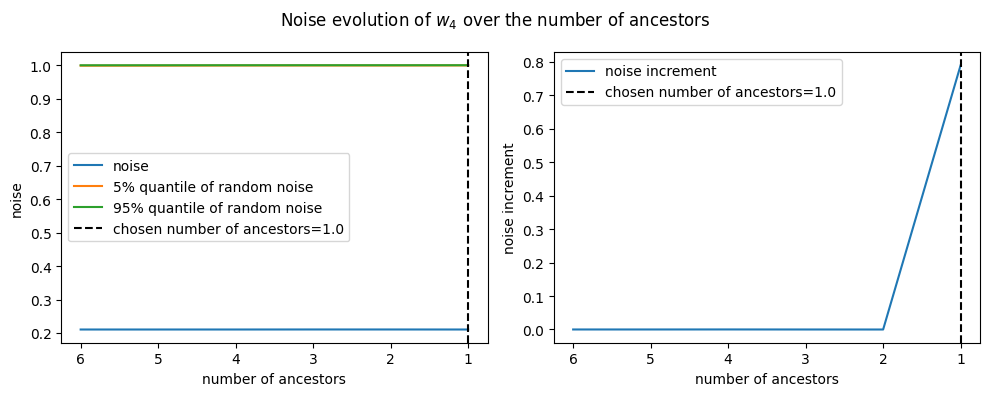

Ancestors of $w_4$: ['$w_3$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.07950895727359543, Z=(1.00, 1.00), gamma=3.48e+00
Kernel [quadratic] has n/(n+s)=0.027619093431812288, Z=(1.00, 1.00), gamma=6.07e+00
Kernel [gaussian] has n/(n+s)=0.017336233067752185, Z=(0.97, 0.98), gamma=1.47e+01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.02 after pruning)


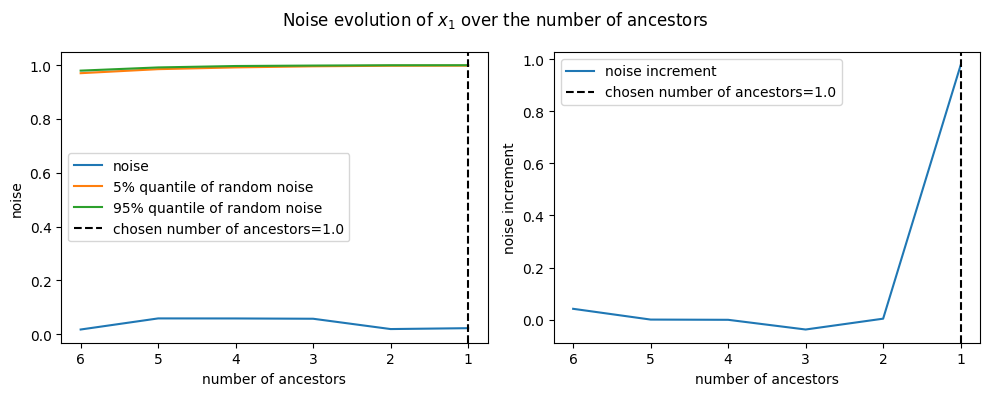

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.4790852779893146, Z=(1.00, 1.00), gamma=1.83e+03
Kernel [quadratic] has n/(n+s)=0.17399162497716286, Z=(1.00, 1.00), gamma=7.16e-02
Kernel [gaussian] has n/(n+s)=0.10075900098280485, Z=(0.98, 0.98), gamma=1.68e+01
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.45 after pruning)


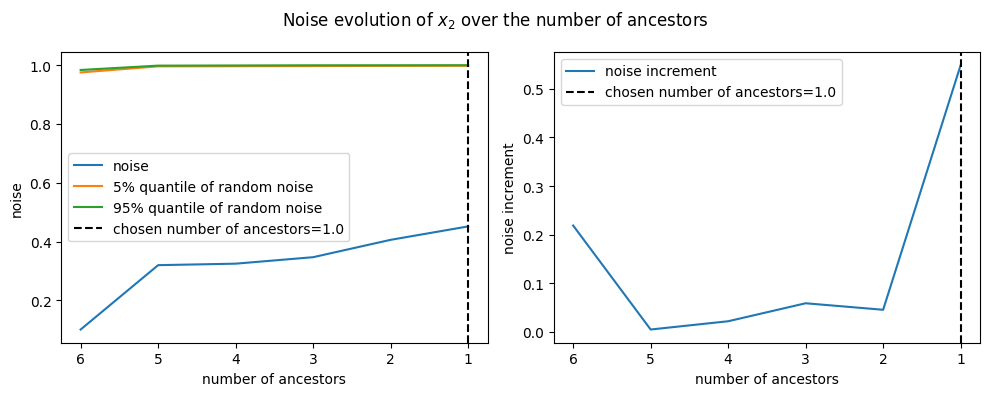

Ancestors of $x_2$: ['$x_1$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.38886411818513156, Z=(1.00, 1.00), gamma=1.37e+03
Kernel [quadratic] has n/(n+s)=0.14858509385319732, Z=(1.00, 1.00), gamma=7.45e+01
Kernel [gaussian] has n/(n+s)=0.018722143691866592, Z=(0.97, 0.98), gamma=1.49e+01
$x_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


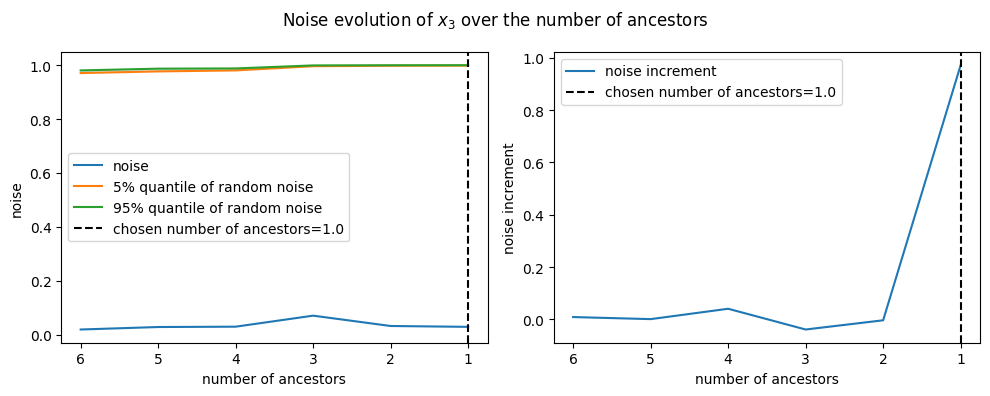

Ancestors of $x_3$: ['$x_1$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.07975034927829602, Z=(1.00, 1.00), gamma=3.45e+00
Kernel [quadratic] has n/(n+s)=0.04759944184718412, Z=(1.00, 1.00), gamma=1.21e+01
Kernel [gaussian] has n/(n+s)=0.03455020657033387, Z=(0.98, 0.98), gamma=6.44e+01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.02 after pruning)


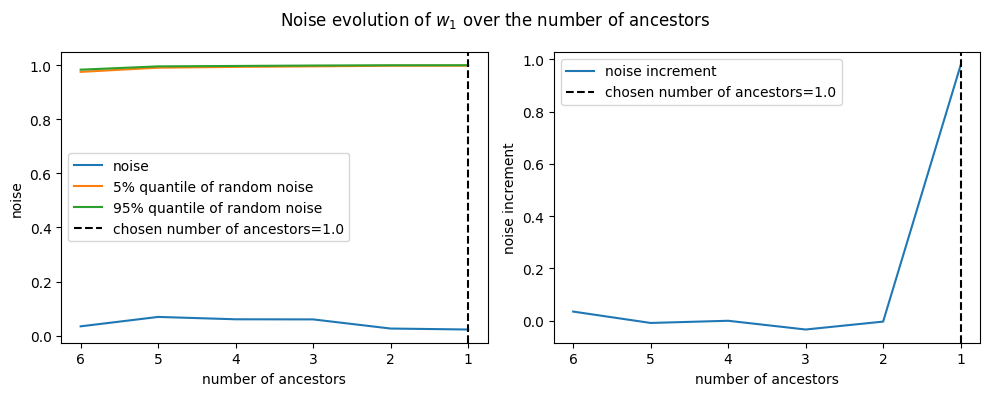

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9645820569003074, Z=(1.00, 1.00), gamma=1.60e+02
Kernel [quadratic] has n/(n+s)=0.21742030221250486, Z=(1.00, 1.00), gamma=2.50e-02
Kernel [gaussian] has n/(n+s)=0.10688401840001385, Z=(0.98, 0.99), gamma=1.81e-01
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.07 after pruning)


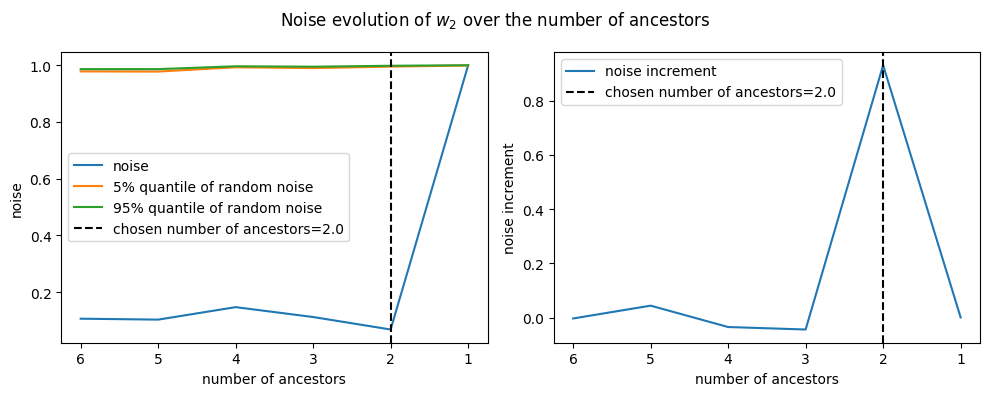

Ancestors of $w_2$: ['$x_1$', '$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.210379882610201, Z=(1.00, 1.00), gamma=2.35e+02
Kernel [quadratic] has n/(n+s)=0.6068212349041573, Z=(1.00, 1.00), gamma=6.76e+01
Kernel [gaussian] has n/(n+s)=0.000845516004907638, Z=(0.89, 0.92), gamma=1.74e-04
$w_3$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.03 after pruning)


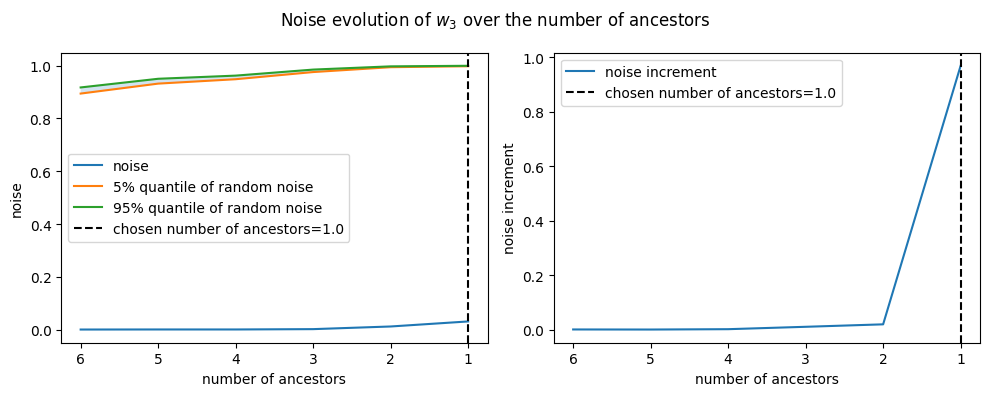

Ancestors of $w_3$: ['$w_4$']



In [26]:
graph_discovery4.fit()

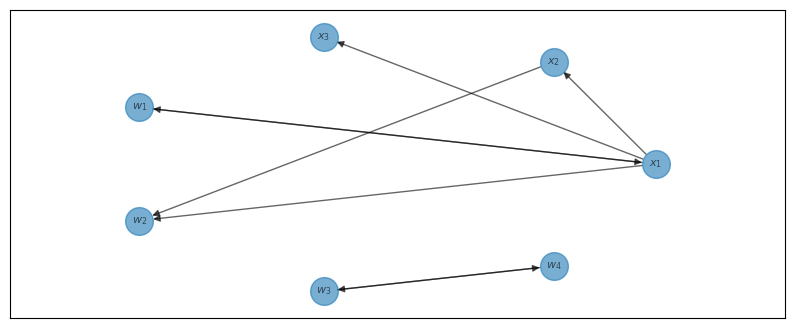

In [27]:
graph_discovery4.plot_graph(type_label=False)

In [28]:
graph_discovery4.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=19.5, noise=0.0223}
x_2
 = 1.0 * x_1 {kernel=gaussian, gamma=60.5, noise=0.451}
x_3
 = 1.0 * x_1 {kernel=gaussian, gamma=6.1, noise=0.0286}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=19.6, noise=0.0228}
w_2
 = 1.0 * x_1 {kernel=gaussian, gamma=0.0347, noise=0.0688}
 + 1.0 * x_2 {kernel=gaussian, gamma=0.0347, noise=0.0688}
w_3
 = 1.0 * w_4 {kernel=gaussian, gamma=0.0274, noise=0.0315}
w_4
 = 1.0 * w_3 {kernel=linear, gamma=235, noise=0.21}


In [29]:
joblib.dump(graph_discovery4, "example4.pkl")

['example4.pkl']